In [81]:
import time
import numpy as np
import sklearn
import pandas as pd
import requests 
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [65]:
cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_col  = 'index')
cars

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
index,,,,,,,,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,0,0,0,0,0,0,0,...,1,5,2417,445.0,medium,0,0,0,1,176000
1,טויוטה קורולה GLI,טויוטה,2011,0,0,0,0,0,0,0,...,1,4,1262,454.5,medium,0,0,0,1,45000
2,קיה פיקנטו LX,קיה,2020,0,0,0,0,0,0,0,...,1,9,1235,359.5,mini,0,0,1,0,79900
3,הונדה סיוויק COMFORT,הונדה,2014,0,0,0,0,0,0,0,...,0,2,1424,430.0,medium,0,0,0,1,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,0,0,0,0,0,0,0,...,1,2,1353,357.1,mini,0,0,1,0,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,0,0,0,0,0,0,0,...,0,5,2019,448.0,medium,0,0,0,1,132000
2998,סקודה פאביה AMBITION,סקודה,2016,0,0,0,0,0,0,0,...,0,4,1102,399.2,small,0,1,0,0,59000
2999,מאזדה 3,מאזדה,2020,0,0,0,0,0,0,0,...,1,11,2130,466.0,medium,0,0,0,1,130500


In [130]:
ElCarsIndex = cars[cars['engine_size'] == "חשמלי"].index
foul_cars = cars.drop(index = foulCarsIndex )
foul_cars['engine_size'] = foul_cars['engine_size'].astype(int)


In [131]:
foul_cars = foul_cars.groupby('size').agg({'engine_size' : "mean"})

foul_cars

,engine_size
size,
large,2467.195426
medium,1664.751363
mini,1245.497738
small,1348.035714


In [153]:
large = foul_cars.iloc[0,0]
med = foul_cars.iloc[1,0]
mini = foul_cars.iloc[2,0]
small = foul_cars.iloc[3,0]

ElCarsIndex = cars[cars['engine_size'] == "חשמלי"].index
ElCarsIndex  = np.array(ElCarsIndex)

for x in ElCarsIndex:
    if (cars.iloc[x, cars.columns.get_loc("size")] == "large"): 
        cars['engine_size'][x] = large 
    if (cars.iloc[x, cars.columns.get_loc("size")] == "medium"): 
        cars['engine_size'][x] = med
    if (cars.iloc[x, cars.columns.get_loc("size")] == "mini"): 
        cars['engine_size'][x] = mini
    if (cars.iloc[x, cars.columns.get_loc("size")] == "small"): 
        cars['engine_size'][x] = small

<ipython-input-153-18929421816c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['engine_size'][x] = med


In [156]:
cars['engine_size'] = cars['engine_size'].astype(int)

In [159]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 3001
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   version               3002 non-null   object 
 1   CompanyName           3002 non-null   object 
 2   year                  3002 non-null   int64  
 3   is_GAC                3002 non-null   int64  
 4   is_maserati           3002 non-null   int64  
 5   is_daihatsu           3002 non-null   int64  
 6   is_porsche            3002 non-null   int64  
 7   is_ds                 3002 non-null   int64  
 8   is_smart              3002 non-null   int64  
 9   is_seres              3002 non-null   int64  
 10  is_cadillac           3002 non-null   int64  
 11  is_דודג'              3002 non-null   int64  
 12  is_infinity           3002 non-null   int64  
 13  is_alfa-romeo         3002 non-null   int64  
 14  is_buick              3002 non-null   int64  
 15  is_sangiang          

In [161]:
cars.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_label  = 'index')

In [162]:
cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_col  = 'index')
cars

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
index,,,,,,,,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,0,0,0,0,0,0,0,...,1,5,2417,445.0,medium,0,0,0,1,176000
1,טויוטה קורולה GLI,טויוטה,2011,0,0,0,0,0,0,0,...,1,4,1262,454.5,medium,0,0,0,1,45000
2,קיה פיקנטו LX,קיה,2020,0,0,0,0,0,0,0,...,1,9,1235,359.5,mini,0,0,1,0,79900
3,הונדה סיוויק COMFORT,הונדה,2014,0,0,0,0,0,0,0,...,0,2,1424,430.0,medium,0,0,0,1,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,0,0,0,0,0,0,0,...,1,2,1353,357.1,mini,0,0,1,0,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,0,0,0,0,0,0,0,...,0,5,2019,448.0,medium,0,0,0,1,132000
2998,סקודה פאביה AMBITION,סקודה,2016,0,0,0,0,0,0,0,...,0,4,1102,399.2,small,0,1,0,0,59000
2999,מאזדה 3,מאזדה,2020,0,0,0,0,0,0,0,...,1,11,2130,466.0,medium,0,0,0,1,130500


In [66]:
#def split_train_test (data , test_ratio)
    #p.55 book...
    

## split to train and test:

In [163]:
c_Train , C_Test =sklearn.model_selection.train_test_split(cars, test_size=0.2 , random_state = 40)


In [164]:
c_Train.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TrainSet_data.csv' , index_label='index' )

In [165]:
C_Test.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TestSet_data.csv' , index_label='index' )

In [166]:
C_Test = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TestSet_data.csv' , index_col  = 'index')

C_Test 

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
index,,,,,,,,,,,,,,,,,,,,,
2999,מאזדה 3,מאזדה,2020,0,0,0,0,0,0,0,...,1,11,2130,466.0,medium,0,0,0,1,130500
2768,רנו גראנד קופה INTENSE,רנו,2018,0,0,0,0,0,0,0,...,1,3,1604,463.2,medium,0,0,0,1,80000
871,קיה נירו EX,קיה,2018,0,0,0,0,0,0,0,...,0,7,1604,435.5,medium,0,0,0,1,108900
2634,דאצ'יה לודגי LAUREATE,דאצ'יה,2018,0,0,0,0,0,0,0,...,0,4,1353,449.8,medium,0,0,0,1,56500
1146,סקודה סקאלה AMBITION,סקודה,2019,0,0,0,0,0,0,0,...,0,9,1529,425.7,medium,0,0,0,1,101000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,דאצ'יה לודגי LAUREATE,דאצ'יה,2016,0,0,0,0,0,0,0,...,0,1,1102,449.8,medium,0,0,0,1,37500
1779,מיצובישי אאוטלנדר INSTYLE,מיצובישי,2017,0,0,0,0,0,0,0,...,0,8,2019,469.5,medium,0,0,0,1,119000
831,טויוטה קורולה SUN,טויוטה,2017,0,0,0,0,0,0,0,...,1,5,1604,462.0,medium,0,0,0,1,79500


In [167]:
C_Train =pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TrainSet_data.csv' , index_col  = 'index')
C_Train 

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
index,,,,,,,,,,,,,,,,,,,,,
2738,פיאט קובו DYNAMIC,פיאט,2014,0,0,0,0,0,0,0,...,0,1,985,395.9,small,0,1,0,0,27000
1001,מאזדה CX-5 SIGNATURE,מאזדה,2021,0,0,0,0,0,0,0,...,1,5,3366,455.0,medium,0,0,0,1,220000
1591,סקודה פאביה STYLE,סקודה,2016,0,0,0,0,0,0,0,...,1,8,1353,399.2,small,0,1,0,0,69900
678,מרצדס CLA קלאס,מרצדס,2021,0,0,0,0,0,0,0,...,1,11,4731,415.7,small,0,1,0,0,330000
1223,ב.מ.וו X4 XDRIVE 20D SPORT,ב.מ.וו,2016,0,0,0,0,0,0,0,...,1,1,3357,467.1,medium,0,0,0,1,165000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,פורד אדג' SEL,פורד,2012,0,0,0,0,0,0,0,...,1,8,1962,467.9,medium,0,0,0,1,69000
1330,מיצובישי אטראז INSTYLE,מיצובישי,2016,0,0,0,0,0,0,0,...,0,4,1102,424.5,medium,0,0,0,1,37400
2213,סיטרואן ברלינגו COMFORT,סיטרואן,2016,0,0,0,0,0,0,0,...,0,2,1604,438.0,medium,0,0,0,1,57900


In [ ]:
#We decided that each of us would work with a model on an independent train and test
#so we would get a more accurate indication of the quality of the model

# scaling the cols

In [ ]:
demo_cars['current_mileage'] = demo_cars['current_mileage'].apply(lambda x : x.replace("," , ''))
demo_cars['current_mileage'].astype(int)

In [175]:
demo_cars = C_Train
min_max_scaler = MinMaxScaler()
demo_cars[["year", "annual_licensing_fee", "engine_size",  "next_test_in" , "car_length" , "current_mileage", "price"]] = min_max_scaler.fit_transform(demo_cars[["year", "annual_licensing_fee", "engine_size",  "next_test_in" , "car_length" ,"current_mileage", "price"]])

In [182]:
demo_cars = demo_cars.drop(columns = ["version" , "CompanyName", "size" , "color" , "original_onership" , "engine_type" , "engine"  ] )


In [183]:
demo_cars

,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,is_cadillac,is_דודג',...,is_company,is_private,next_test_in,annual_licensing_fee,car_length,large,small,mini,medium,price
index,,,,,,,,,,,,,,,,,,,,,
2738,0.619048,0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0.027266,0.479696,0,1,0,0,0.011806
1001,0.952381,0,0,0,0,0,0,0,0,0,...,0,1,0.333333,0.645547,0.703985,0,0,0,1,0.145833
1591,0.714286,0,0,0,0,0,0,0,0,0,...,0,1,0.583333,0.122825,0.492220,0,1,0,0,0.041597
678,0.952381,0,0,0,0,0,0,0,0,0,...,0,1,0.833333,1.000000,0.554839,0,1,0,0,0.222222
1223,0.714286,0,0,0,0,0,0,0,0,0,...,0,1,0.000000,0.643210,0.749905,0,0,0,1,0.107639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,0.523810,0,0,0,0,0,0,0,0,0,...,0,1,0.583333,0.280966,0.752941,0,0,0,1,0.040972
1330,0.714286,0,0,0,0,0,0,0,0,0,...,0,0,0.250000,0.057647,0.588235,0,0,0,1,0.019028
2213,0.714286,0,0,0,0,0,0,0,0,0,...,0,0,0.083333,0.188003,0.639469,0,0,0,1,0.033264


In [ ]:
demo_cars..to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TraitSetScale_data.csv' , index_label='index' )

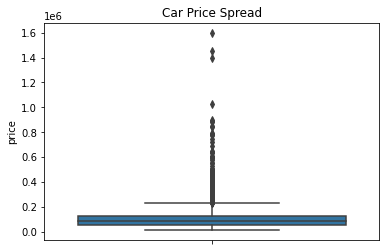

count    3.002000e+03
mean     1.114245e+05
std      1.067789e+05
min      1.000000e+04
25%      5.490000e+04
50%      8.790000e+04
75%      1.250000e+05
max      1.600000e+06
Name: price, dtype: float64


In [184]:
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)
plt.show()
print(cars.price.describe())

In [ ]:
def heatmap(x,y,dataframe):
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()
    
heatmap (10 , 10 , cars)